In [1]:
import os

os.environ["DGLBACKEND"] = "pytorch"
import dgl
import dgl.data
import torch
import torch.nn as nn
import torch.nn.functional as F


c:\Users\87029\anaconda3\envs\DGL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = dgl.data.CoraGraphDataset()
print(f"Number of categories: {dataset.num_classes}")
g = dataset[0]
print("Node features")
print(g.ndata)
print(type(g.ndata))
print(g.ndata.keys())
print(g.ndata['train_mask'])

print(g.ndata['feat'].shape)
print(g.ndata['label'].unique())
#意思=

print("Edge features")
print(g.edata)


  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
Number of categories: 7
Node features
{'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'label': tensor([3, 4, 4,  ..., 3, 3, 3]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True]), 'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}
<class 'dgl.view.HeteroNodeDataView'>
dict_keys(['train_mask', 'label', 'val_mask', 'test_mask', 'feat'])
tensor([ True,  True,  True,  ..., False, False, False])
torch.Size([2708, 1433])
tensor([0, 1, 2, 3, 4, 5, 6])
Edge features
{}


In [3]:
t1 = torch.tensor([[0.1, 0.8, 0.9]])
print(t1.argmax(1))
# 假设预测的概率分布
pred = torch.tensor([[0.1, 0.8, 0.1]])
# 真实的标签（one-hot 编码）
target = torch.tensor([0])

loss = F.cross_entropy(pred, target)
print(loss)
target = torch.tensor([1])

loss = F.cross_entropy(pred, target)
print(loss)

tensor([2])
tensor(1.3897)
tensor(0.6897)


In [4]:
from dgl.nn import GraphConv


class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h


# Create the model with given dimensions
#  gcn —— in_feats, h_feats, num_classes    
model = GCN(g.ndata["feat"].shape[1], 16, dataset.num_classes)
print(g.ndata["feat"].shape[1], 16, dataset.num_classes)
# 1433 16 7

# math.sqrt(1433/7) =14


1433 16 7


# 1bufen处理样本x得到ast

~~存储规则: parsed_rules[repr(left_ast)] = right_ast 将左边的AST表示（使用 repr 函数生成字符串表示）作为字典的键，右边的AST作为值存储在字典中。~~

~~唯一性问题: 如果两个规则的左边bufen生成的AST表示相同，字典中只会保留最后一个规则的右边部分。例如，c(x) -> c(a(x)) 和 c(x) -> c(b(x)) 会导致字典中只有一个 c(x) 的条目。~~

现在2024年8月7日14:06:09
例如，可以使用一个字典，其中键是左边的AST表示，值是一个列表，存储所有对应的右边AST：



下面这个可以读取变量 var

In [5]:
# 1部分=处理样本x得到ast
import re
from typing import Any, Dict, List, Union
from typing import Tuple

# 定义AST节点的类型
class ASTNode:
    def __init__(self, type: str, value: Any = None, children: List['ASTNode'] = None):
        self.type = type
        self.value = value
        # none cause error
        self.children = children if children else [] 
        self.number = -1
        # temorary order
        self.order = -1
        

    def __repr__(self):
        if self.children:
            return f"({self.type} {self.value} {self.children})"
        return f"({self.type} {self.value})"
    
    def __hash__(self):
        
        return hash((self.type, self.value, tuple(hash(child) for child in self.children)))

    def __eq__(self, other):
        if not isinstance(other, ASTNode):
            return False
        return self.type == other.type and self.value == other.value and self.children == other.children

def test(node):
    print(f"当前节点值: {node.value}")
    
    if(node.children == []):
        pass
    else :
        print("子节点:")
        for child in node.children:
            print(child.value)
            
        for child in node.children:
            test(child)
#     好的，我来简化这个test函数的思路：
# 1. 打印当前节点值
# 如果有子节点：
# 先列出所有子节点值
# 然后递归访问每个子节点
# 这种方法先给出节点的整体结构，再深入细节，有助于理解树的层次关系。


def parse_expression_to_token(expr):
    tokens = []
    current_token = ""
    
    for char in expr:
        if char in "(),":
            if current_token:
                tokens.append(current_token)
                current_token = ""
            tokens.append(char)
        else:
            current_token += char
    
    if current_token:
        tokens.append(current_token)
    
    # 过滤掉逗号
    tokens = [token for token in tokens if token != ","]
    
    return tokens

# 解析函数表达式
def parse_expression(expr: str, variables: Dict[str, str]) -> Tuple[ASTNode, List[ASTNode]]:
    # 修改后的正则表达式，包含对加号、减号、乘号、除号和数字0的匹配
    # 我现在想让他匹配任何符号 只是遇到括号和逗号的情况下分开成多个token
    tokens = parse_expression_to_token(expr)
    
    print(tokens)
    stack = []
    current_node = None
    node_list = []
    
    first_node = None
    for token in tokens:
        if token == '(':
            stack.append(current_node)
        elif token == ')':
            stack.pop()
        else:
            node_type = 'var' if token in variables else 'fun'
            node = ASTNode(node_type, token)
            current_node = node
            if stack:
                print(stack[-1])
                stack[-1].children.append(node)
                node_list.append(node)
            else:
                # -1 init
                current_node = node
                first_node = node
    
    
    # test
    # test(first_node)
    # print(first_node.__hash__())
    
    # try:
    #     # 尝试执行的代码
    #     print(first_node.children[2].value)
    #     print(222)
    # except:
    #     # 忽略所有错误
    #     pass

    return first_node

# 您的理解非常正确。我来解释一下这个函数的主要思路：
# 1. 使用一个栈（stack）来跟踪当前应该添加子节点的位置。
# 遍历所有标记（tokens）：
# a. 如果遇到左括号 '('：
# 将当前节点压入栈中，表示接下来的节点应该作为这个节点的子节点。
# b. 如果遇到右括号 ')'：
# 弹出栈顶元素，表示当前层级的子节点添加完毕。
# c. 如果是其他标记（函数名或变量名）：
# 创建新的 ASTNode，类型为 'var' 或 'call'。
# 如果栈不为空，将新节点添加为栈顶节点的子节点。
# 如果栈为空，说明这是根节点。
# 最终，first_node 存储了整个语法树的根节点。
# 这种方法巧妙地利用栈来处理嵌套结构，将线性的标记序列转换为树形的语法结构。栈的深度反映了当前处理的节点在树中的深度，确保了子节点被正确地添加到相应的父节点下。

# 解析规则
def parse_rules(rules: List[str], variables: Dict[str, str]) -> Dict[str, List[ASTNode]]:
    parsed_rules = {}
    asts = []
    for rule in rules:
        print(rule)
        left, right = rule.split('->')
        print(left, right)
        left_ast = parse_expression(left.strip(), variables)
        right_ast = parse_expression(right.strip(), variables)
        
        asts.append([left_ast, right_ast])
    return asts
    # parse_rules 最后输出的就是2个东西的list 分别是 左边的表达式 和 右边的表达式 都是 ASTNode

# 解析输入
def parse_input(input_str: str) -> Dict[str, List[ASTNode]]:
    lines = input_str.strip().split('\n')
    variables = {}
    rules = []
    in_comment_block = False
    current_rule = ""
    for line in lines:
        if line.startswith('(VAR'):
            var_names = line[5:-1].split()
            for var_name in var_names:
                variables[var_name] = 'variable'
        elif line.startswith('(RULES'):
            pass
        elif line.startswith('(COMMENT'):
            in_comment_block = True
        elif line.startswith(')'):
            in_comment_block = False
        elif line.startswith('(SIG'):
            pass
        elif not in_comment_block:
            stripped_line = line.strip()
            if "->" in stripped_line:
                
                if current_rule:
                    # 说明这是一个跨行规则的结束。我们将当前行添加到 current_rule，然后将完整的规则添加到 rules 列表
                    current_rule += " " + stripped_line
                    rules.append(current_rule)
                    current_rule = ""
                else:
                    # 如果 current_rule 为空，说明这是一个单行规则，直接添加到 rules 列表中。
                    rules.append(stripped_line)
            else:
                if current_rule:
                    current_rule += " " + stripped_line
                else:
                    current_rule = stripped_line
    #test 
    # print(rules)
    #删除最后一个 现在不用了 处理了)
    # rules.pop()
    return parse_rules(rules, variables)



# 示例输入
input_str = """
(VAR x y)
(RULES
  g(a) -> f(g(a))
  g(b) -> c
  a -> b
  f(x) -> h(x,x)
  h(x,y,ff(0),c,x,y) -> c
)
(COMMENT
doi:10.1007/11805618_6
[7] Example 1
submitted by: Takahito Aoto, Junichi Yoshida, and Yoshihito Toyama
)


"""
# 可允许多余空行

# h(x,y,f(x),c,x,y)
# h(x,y,s(x,f(y)),c,f(x),y) -> c

# 解析并生成AST
rules_ast = parse_input(input_str)

# 打印asts
for ast in rules_ast:
    print(ast)

g(a) -> f(g(a))
g(a)   f(g(a))
['g', '(', 'a', ')']
(fun g)
['f', '(', 'g', '(', 'a', ')', ')']
(fun f)
(fun g)
g(b) -> c
g(b)   c
['g', '(', 'b', ')']
(fun g)
['c']
a -> b
a   b
['a']
['b']
f(x) -> h(x,x)
f(x)   h(x,x)
['f', '(', 'x', ')']
(fun f)
['h', '(', 'x', 'x', ')']
(fun h)
(fun h [(var x)])
h(x,y,ff(0),c,x,y) -> c
h(x,y,ff(0),c,x,y)   c
['h', '(', 'x', 'y', 'ff', '(', '0', ')', 'c', 'x', 'y', ')']
(fun h)
(fun h [(var x)])
(fun h [(var x), (var y)])
(fun ff)
(fun h [(var x), (var y), (fun ff [(fun 0)])])
(fun h [(var x), (var y), (fun ff [(fun 0)]), (fun c)])
(fun h [(var x), (var y), (fun ff [(fun 0)]), (fun c), (var x)])
['c']
[(fun g [(fun a)]), (fun f [(fun g [(fun a)])])]
[(fun g [(fun b)]), (fun c)]
[(fun a), (fun b)]
[(fun f [(var x)]), (fun h [(var x), (var x)])]
[(fun h [(var x), (var y), (fun ff [(fun 0)]), (fun c), (var x), (var y)]), (fun c)]


In [6]:
import dgl
import torch

# 创建一个空的图
g = dgl.DGLGraph()

# 添加节点
g.add_nodes(4)

# 添加边
# 边的源节点和目标节点
src = torch.tensor([0, 0, 1])
dst = torch.tensor([1, 2, 3])
g.add_edges(src, dst)

# 打印图的信息
print("图的节点数:", g.number_of_nodes())
print("图的边数:", g.number_of_edges())
print("节点ID:", g.nodes())
print("边ID:", g.edges())

# 可以为节点和边添加特征
g.ndata['h'] = torch.randn(4, 3)  # 为每个节点添加一个3维的特征向量
# g.edata['w'] = torch.randn(3, 1)  # 为每条边添加一个1维的特征向量

# 打印节点和边的特征
print("节点特征:", g.ndata['h'])
# print("边特征:", g.edata['w'])

# 生成一个4x3的随机张量
tensor = torch.randn(4, 3)

# 打印张量的类型
print(tensor.dtype)  # 输出: torch.float32

图的节点数: 4
图的边数: 3
节点ID: tensor([0, 1, 2, 3])
边ID: (tensor([0, 0, 1]), tensor([1, 2, 3]))
节点特征: tensor([[ 0.2756, -1.9259, -0.5606],
        [ 0.8611, -0.1669, -0.6320],
        [ 1.0702, -0.8594, -0.6286],
        [ 1.7634,  1.1583, -0.5670]])
torch.float32


c:\Users\87029\anaconda3\envs\DGL\lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(



转换ast到图 然后图和特征变成dgl
但是我想保存图为csv 怎么办？


pickle方法简单快速，但不易读和跨平台。
DGL内置方法专门为DGL图设计，但可能依赖特定版本的DGL。
JSON+CSV方法更易读和跨平台，但处理大图时可能较慢。

图的数据不能特别大 不超过15或20 有这种说法吗

现在不是一个树了 就是图 因为有常数=函数。
我感觉就算有 也可以建立一个树而不是图 

给每个类一个数值 这样比hash更完美。hash有可能出错。
数学上为什么会这样 不明白 但是看起来合理。


In [7]:
# 2部分=转换ast到dgl的图 

import dgl
import torch
from typing import Dict, List
import re


# 我感觉next_number应该是更全局的变量 否则多孩子的情况下可能多个点number相同了
# ai的方法大炮打蚊子 

# 先说 我们是工业化 标准化的产品。
# 营销号 我们是出售思想 然后把这个当做自己所谓的升华。 
# 真愿 什么的东西 
# 内心底发出的愿望 做出来很不错。




def assign_numbers(node: ASTNode):
    global node_num
    node.number = node_num
    node_num += 1
    # gloabl ast_node_list
    # 
    ast_node_list.append(node)
    #test 
    # print(node.number , node.value)
    
    for child in node.children:
        assign_numbers(child)

def build_graph(node: ASTNode, graph: dgl.DGLGraph, node_features: List[Any]):
    src = node.number
    node_features.append((node.type, node.value))
    for child in node.children:
        dst = child.number
        graph.add_edges(src, dst)  # 是否无向图
        
        build_graph(child, graph, node_features)

def create_dgl_graph(root: ASTNode) -> dgl.DGLGraph:
    assign_numbers(root)
    graph = dgl.DGLGraph()
    node_features = []
    build_graph(root, graph, node_features)
    # graph.add_nodes(len(node_features))
    # graph.ndata['features'] = torch.tensor([[ord(c) for c in str(feat)] for feat in node_features])
    return graph



def process_sp(value):
    if value not in sp_dict:
        sp_dict[value] = len(sp_dict) + 1
    return sp_dict[value]

def process_var(value):
    if value not in var_dict:
        var_dict[value] = len(var_dict) + 1
    return var_dict[value]

def process_fun(value):
    if value not in fun_dict:
        fun_dict[value] = len(fun_dict) + 1
    return fun_dict[value]


def process_astnode(node):
    if node.type == 'sp':
        number = process_sp(node.value)
        feature = [number, 0, 0]  # 对应于sp的特征向量
    elif node.type == 'var':
        number = process_var(node.value)
        feature = [0, number, 0]  # 对应于var的特征向量
    elif node.type == 'fun':
        number = process_fun(node.value)
        feature = [0, 0, number]  # 对应于fun的特征向量
    else:
        raise ValueError(f"Unknown node type: {node.type}")
    
    # 添加order作为第四个维度
    order = 0 if node.order == -1 else node.order
    feature.append(order)

    # 将特征向量转换为tensor
    feature_tensor = torch.tensor(feature, dtype=torch.float32)
    return feature_tensor


def ast_to_dgl(asts: List[List[ASTNode]]) -> dgl.DGLGraph:
    graphs = []
    
    # 2024年8月16日15:27:26 修改策略 直接建立一个完整的ast 然后从真root开始转换到dgl 
    # class ASTNode:
    # def __init__(self, type: str, value: Any = None, children: List['ASTNode'] = None):
    #     self.type = type
    #     self.value = value
    #     # none cause error
    #     self.children = children if children else [] 
    #     self.number = -1
    #     # temorary order
    #     self.order = -1
    root = ASTNode("sp", "ROOT", [])
    for ast in asts:
        #建立一个子节点 
        left = ASTNode("sp", "left", [ast[ 0]])
        right = ASTNode("sp", "right", [ast[ 1]])
        child = ASTNode("sp", "->", [ left, right ])
        root.children.append(child)
        
    # test(root)
        
    dgl_graph = create_dgl_graph(root)
    # 处理所有节点并收集特征
    node_features = []
    for node in ast_node_list:
        feature = process_astnode(node)
        node_features.append(feature)
    
    # 将所有特征组合成一个张量
    node_features_tensor = torch.stack(node_features)
    # 输出特征的规模长宽
    print(f"特征张量的形状: {node_features_tensor.shape}")
    print(f"节点数量: {node_features_tensor.shape[0]}")
    print(f"特征维度: {node_features_tensor.shape[1]}")
    
    # 将特征张量设置为图的节点特征
    dgl_graph.ndata['feat'] = node_features_tensor
    # # test nx
    # import dgl
    # import networkx as nx
    # import matplotlib.pyplot as plt

    # # 假设你已经有一个DGL图 dgl_graph
    # # dgl_graph = ...

    # # 将DGL图转换为NetworkX图
    # nx_graph = dgl_graph.to_networkx()
    
    # # 可视化NetworkX图
    # pos = nx.spring_layout(nx_graph)  # 选择布局算法
    # nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    
    # plt.show()
    # # test pic = 1723794821725

    ### 有向图更好 特征信息更多 所以不管。

    return dgl_graph


# 示例输入
input_str = """
(VAR x y)
(RULES
  g(a) -> f(g(a))
  g(b) -> c
  a -> b
  f(x) -> h(x,x)
  h(x,y,f(x),c,x,y) -> c
)
(COMMENT
doi:10.1007/11805618_6
[7] Example 1
submitted by: Takahito Aoto, Junichi Yoshida, and Yoshihito Toyama
)
"""

# 解析并生成AST

rules_ast = parse_input(input_str)

# 将AST转换为DGL图
# global init
node_num = 0
ast_node_list = []
# 全局字典，用于存储每种类型的值及其对应的编号
sp_dict = {}
var_dict = {}
fun_dict = {}
dgl_graph = ast_to_dgl(rules_ast)

# graph = create_dgl_graph(root)
# print(graph)
# print(graph.ndata['features'])


print(dgl_graph)

# q1
# graph.add_n
# odes(len(node_features))
# 所以点特别多
# Graph(num_nodes=44, num_edges=14,



g(a) -> f(g(a))
g(a)   f(g(a))
['g', '(', 'a', ')']
(fun g)
['f', '(', 'g', '(', 'a', ')', ')']
(fun f)
(fun g)
g(b) -> c
g(b)   c
['g', '(', 'b', ')']
(fun g)
['c']
a -> b
a   b
['a']
['b']
f(x) -> h(x,x)
f(x)   h(x,x)
['f', '(', 'x', ')']
(fun f)
['h', '(', 'x', 'x', ')']
(fun h)
(fun h [(var x)])
h(x,y,f(x),c,x,y) -> c
h(x,y,f(x),c,x,y)   c
['h', '(', 'x', 'y', 'f', '(', 'x', ')', 'c', 'x', 'y', ')']
(fun h)
(fun h [(var x)])
(fun h [(var x), (var y)])
(fun f)
(fun h [(var x), (var y), (fun f [(var x)])])
(fun h [(var x), (var y), (fun f [(var x)]), (fun c)])
(fun h [(var x), (var y), (fun f [(var x)]), (fun c), (var x)])
['c']
特征张量的形状: torch.Size([40, 4])
节点数量: 40
特征维度: 4
Graph(num_nodes=40, num_edges=39,
      ndata_schemes={'feat': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={})


In [8]:
# 部分3 总的来说，这段代码是在处理一个包含客户端接口和交易信息的JSON数据，并将其转换为一个更简化的格式，主要保留了资源状态（转换为二进制标志）和持续时间信息。这可能是为了后续的数据分析或机器学习任务准备数据。
import json


# 读取JSON文件
file_path = 'db-trains/db-trains-init.json'
with open(file_path, 'r') as file:
    
    data = json.load(file)

dataset = {}
csi_name = {}
csi_sum = 0

# 遍历所有csi键 
for csi_key, csi_data in data.items():
    csi_sum = csi_sum +1
    csi_name[csi_key] =  csi_sum
    # print(f"CSI Key: {csi_key}")
    for trs_key, trs_data in csi_data.items():
        # print(f"  TRS Key: {trs_key}")
        match = re.match(r'(\d+)\.trs', trs_key)
        trs_key_int = int(match.group(1))
        if len(trs_data) == 4:
            amount, duration, resource_status, status_code = trs_data
            # print(f"    Amount: {amount}")
            # print(f"    Duration: {duration}")
            # print(f"    Resource Status: {resource_status}")
            p = 0
            if(resource_status == 'NO' or resource_status == 'YES'):
                # print(resource_status)
                p = 1
            if(trs_key_int not in dataset):
                # dataset[trs_key_int] = [csi_name[csi_key],p]
                dataset[trs_key_int] = [p,duration]
            else:
                # print(dataset)
                dataset[trs_key_int] = dataset[trs_key_int] + [p,duration]
            # print(f"    Status Code: {status_code}")
        else:
            print(f"    Invalid TRS data format: {trs_data}")
# for key,_ in dataset:

# test 
print(dataset[10])
print(len(dataset[10]))
print(dataset.keys())



[1, 0.093, 1, 0.036, 0, 30, 1, 0.01, 0, 30, 0, 30, 0, 30, 1, 0.119, 1, 0.214, 0, 30, 1, 0.079, 1, 0.052, 0, 30, 1, 0.029, 0, 30, 1, 0.179, 0, 30, 1, 0.22, 0, 30, 0, 30, 0, 30, 0, 30, 0, 30, 0, 30]
48
dict_keys([1, 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 101, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 102, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 103, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 1124, 1127, 1129, 113, 1131, 1132, 1133, 114, 1147, 1148, 1149, 115, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 116, 1160, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 1279, 128, 1280, 1281, 1282, 1283, 1284, 1285, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 1649, 165, 1650, 1651, 1652, 1653, 1654, 1655, 166, 167, 168,

In [9]:
# =部分4 将其转换为抽象语法树（AST），然后将AST转换为DGL（Deep Graph Library）图，并保存这些图


graphs = []
for key in dataset.keys():
    # print(key)
    # 打开key.txt然后读取里面的所有文字组成一个字符串
    # 改一下文件名 是problems_txt 目录下面 的key.txt 
    file_path = f"problems_txt/{key}.txt"
    
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # 保留空行，不合并行
        print(f"文件 {key}.txt 的内容：{content}")
        
        rules_ast = parse_input(content)

        # 将AST转换为DGL图
        # global init
        node_num = 0
        ast_node_list = []
        # 全局字典，用于存储每种类型的值及其对应的编号
        sp_dict = {}
        var_dict = {}
        fun_dict = {}
        dgl_graph = ast_to_dgl(rules_ast)

        # 获取当前图的标签数据
        current_data = dataset[key]
        print("current_data:", current_data)
        
        # 将标签添加到图中
        node_features = torch.tensor(current_data, dtype=torch.float32).unsqueeze(0).expand(dgl_graph.num_nodes(), -1)

        dgl_graph.ndata['label'] = node_features
        # 报错 DGLError: Expect number of features to match number of nodes (len(u)). Got 48 and 47 instead.
        
        # 尝试dataloader https://www.bilibili.com/video/BV1Ct4y1f7Hr?t=199.3&p=6

        # 保存dgl_graph
        dgl.save_graphs(f"saved_graphs/{key}.dgl", [dgl_graph])
        print(f"图 {key} 已保存")

        # # 读取dgl_graph
        # loaded_graphs, _ = dgl.load_graphs(f"saved_graphs/{key}.dgl")
        # loaded_graph = loaded_graphs[0]
        # print(f"图 {key} 已读取")

        # # 验证读取的图是否与原图相同
        # assert dgl_graph.num_nodes() == loaded_graph.num_nodes(), "节点数不匹配"
        # assert dgl_graph.num_edges() == loaded_graph.num_edges(), "边数不匹配"
        # assert torch.all(dgl_graph.ndata['label'] == loaded_graph.ndata['label']), "节点标签不匹配"
        # print(f"图 {key} 验证通过")

        graphs.append(dgl_graph)

    except FileNotFoundError:
        print(f"文件 {key}.txt 不存在")
    except IOError:
        print(f"读取文件 {key}.txt 时发生错误")
    # break

文件 1.txt 的内容：(VAR x y)
(RULES
  f(x,y) -> x
  f(x,y) -> f(x,g(y))
  g(x) -> h(x)
  F(g(x),x) -> F(x,g(x))
  F(h(x),x) -> F(x,h(x))
)
(COMMENT
doi:10.1007/BFb0027006
[1] Example 6
submitted by: Takahito Aoto, Junichi Yoshida, and Yoshihito Toyama
)

f(x,y) -> x
f(x,y)   x
['f', '(', 'x', 'y', ')']
(fun f)
(fun f [(var x)])
['x']
f(x,y) -> f(x,g(y))
f(x,y)   f(x,g(y))
['f', '(', 'x', 'y', ')']
(fun f)
(fun f [(var x)])
['f', '(', 'x', 'g', '(', 'y', ')', ')']
(fun f)
(fun f [(var x)])
(fun g)
g(x) -> h(x)
g(x)   h(x)
['g', '(', 'x', ')']
(fun g)
['h', '(', 'x', ')']
(fun h)
F(g(x),x) -> F(x,g(x))
F(g(x),x)   F(x,g(x))
['F', '(', 'g', '(', 'x', ')', 'x', ')']
(fun F)
(fun g)
(fun F [(fun g [(var x)])])
['F', '(', 'x', 'g', '(', 'x', ')', ')']
(fun F)
(fun F [(var x)])
(fun g)
F(h(x),x) -> F(x,h(x))
F(h(x),x)   F(x,h(x))
['F', '(', 'h', '(', 'x', ')', 'x', ')']
(fun F)
(fun h)
(fun F [(fun h [(var x)])])
['F', '(', 'x', 'h', '(', 'x', ')', ')']
(fun F)
(fun F [(var x)])
(fun h)
特征张量的形状: to

In [10]:
# 举例子
# https://www.bilibili.com/video/BV1Ct4y1f7Hr?t=343.6&p=6

# 他没处理具体数据 所以没意识到问题 
# 如果你没有 gdata 这个字段，那么你可以使用 ndata 来存储全局特征，但需要确保每个节点都有一个特征向量。你可以将全局特征复制到每个节点的特征向量中。

import dgl
import torch

# 创建一个DGL图，假设有47个节点
dgl_graph = dgl.graph(([0, 1, 2], [1, 2, 0]))
dgl_graph.add_nodes(44)  # 添加足够的节点，使得总节点数为47

# 假设你有一个48维的全局特征向量
global_feature = torch.randn(48)

# 将全局特征复制到每个节点的特征向量中
node_features = global_feature.unsqueeze(0).expand(dgl_graph.num_nodes(), -1)

# 将节点特征存储在ndata中
dgl_graph.ndata['feat'] = node_features

print(dgl_graph.ndata['feat'])

# ——————
# 节点数据 (ndata_schemes)：

# 'attr'：每个节点有一个形状为 (3,) 的特征向量，数据类型为 torch.float32。

# 'label'：每个节点有一个标量标签，数据类型为 torch.int64。

# 他如果也是如此那先这样吧 反正凑合用。
# ——————


SyntaxError: invalid syntax (3442004888.py, line 1)

In [ ]:
# 部分6
from dgl.nn import GraphConv



class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, num_classes)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        g.ndata["h"] = h
        return dgl.mean_nodes(g, "h")

In [ ]:
# 部分7
# Create the model with given dimensions
in_feats = 4
h_feats = 16
num_classes = 48
model = GCN( in_feats, h_feats, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(20):
    epoch_loss = 0
    for g in train_dataloader:
        # 这个错误信息表明在你的图中有入度为0的节点，这会导致某些应用中的输出无效，并可能引起性能下降。解决这个问题的一个常见方法是向图中添加自环（self-loop），这样每个节点都会有至少一条入边。
        g = dgl.add_self_loop(g)

        pred = model(g, g.ndata["feat"].float())

        # 我要48维输出和48维标签比相似度 用什么 不是这个cross_entropy吧
        mse_loss = torch.nn.MSELoss()
        # print(  pred.shape, g.ndata["label"].shape)
        # torch.Size([1, 48]) torch.Size([356, 48])

        # 输出 pred 和 g.ndata["label"][0] 的形状
        print("pred 的形状:", pred.shape)
        print("g.ndata['label'][0] 的形状:", g.ndata["label"][0].shape)

        loss = mse_loss(pred, g.ndata["label"][0])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print("Epoch {:05d} | Loss {:.4f}".format(epoch, epoch_loss / len(train_dataloader)))
num_correct = 0
num_tests = 0

epoch_loss = 0
for g in test_dataloader:
    g = dgl.add_self_loop(g)
    pred = model(g, g.ndata["feat"].float())
    # 只算相似度
    loss = mse_loss(pred, g.ndata["label"][0])
    epoch_loss += loss.item()
print("Test Loss {:.4f}".format(epoch_loss / len(test_dataloader)))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取CSV文件
data = pd.read_csv('your_dataset.csv')

# 假设最后一列是标签列，其余列是特征列
X = data.iloc[:, :-1].values  # 特征
y = data.iloc[:, -1].values   # 标签

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印划分后的数据集大小
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

In [ ]:

def read_file_list(file_list_path):
    """
    读取包含文件名的文件，并返回文件名列表
    """
    with open(file_list_path, 'r') as file:
        file_names = [line.strip() for line in file]
    return file_names

def read_files_content(file_names):
    """
    根据文件名列表读取每个文件的内容，并返回内容列表
    """
    contents = []
    for file_name in file_names:
        with open(file_name, 'r') as file:
            content = file.read()
            contents.append(content)
    return contents

def main():
    file_list_path = 'path_to_your_file_list.txt'  # 替换为你的文件列表文件路径
    file_names = read_file_list(file_list_path)
    contents = read_files_content(file_names)
    
    # 打印每个文件的内容
    for file_name, content in zip(file_names, contents):
        print(f"Content of file '{file_name}':")
        print(content)
        print('-' * 40)

if __name__ == "__main__":
    main()

In [11]:
# =部分5 训练集处理 打包 
# 7. 所有的 DataLoader 都设置 batch_size=1 和 drop_last=False，意味着每次只处理一个图，并且不丢弃最后一个不完整的批次。


from dgl.dataloading import GraphDataLoader


from torch.utils.data.sampler import SubsetRandomSampler


# 怎么得到
dataset = graphs
num_examples = len(dataset)
num_train = int(num_examples * 0.8)
# 打印输出大小
print("数据集大小:", num_examples)
print("训练集大小:", num_train)
print("测试集大小:", num_examples - num_train)

san_sampler = SubsetRandomSampler(torch.arange(2))

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(
    dataset, sampler=train_sampler, batch_size=1, drop_last=False
)
test_dataloader = GraphDataLoader(
    dataset, sampler=test_sampler, batch_size=1, drop_last=False
)
san_dataloader = GraphDataLoader(
    dataset, sampler=san_sampler, batch_size=1, drop_last=False
)


# Graph(num_nodes=23777, num_edges=23316,
#       ndata_schemes={'feat': Scheme(shape=(4,), dtype=torch.float32), 'label': Scheme(shape=(48,), dtype=torch.float32)}
#       edata_schemes={})

数据集大小: 577
训练集大小: 461
测试集大小: 116


In [12]:
# =部分6.1 神经网络结构
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
from dgl.nn import GraphConv

class ImprovedGCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_strategies):
        super(ImprovedGCN, self).__init__()
        h1 = 32
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, h_feats)
        self.fc1 = nn.Linear(h_feats, h_feats * 2)
        self.fc2 = nn.Linear(h_feats * 2, h_feats * 2)
        self.fc3 = nn.Linear(h_feats * 2, num_strategies * 2)
        # self.dropout = nn.Dropout(0.5)
        self.num_strategies = num_strategies

    def forward(self, g, in_feat):
        h = F.relu(self.conv1(g, in_feat))
        h = F.relu(self.conv2(g, h))
        hg = h.sum(dim=0)
        hg = hg.unsqueeze(0)  # 添加一个维度，变成 [1, 64]
        # print(hg.shape)
        # torch.Size([1, 64])
        # torch.Size([64])
        
        # input()
        
        h = F.relu(self.fc1(hg))
        # h = self.dropout(h)
        h = F.relu(self.fc2(h))
        # h = self.dropout(h)
        out = self.fc3(h)
        
        # 分离概率和时间预测
        probs = torch.sigmoid(out[:, :self.num_strategies])
        times = F.relu(out[:, self.num_strategies:])
        
        return probs, times

# 创建模型实例
in_feats = 4  # 输入特征维度
h_feats = 64  # 增加隐藏层维度
num_strategies = 24  # 假设有24个策略




In [ ]:
# =部分6.2 神经网络结构 改造1
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
from dgl.nn import GraphConv

class ImprovedGCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_strategies):
        super(ImprovedGCN, self).__init__()
        h1 = 32
        self.convs = nn.ModuleList([GraphConv(in_feats, h_feats)] + 
                                   [GraphConv(h_feats, h_feats) for _ in range(9)])
        self.fc1 = nn.Linear(h_feats, h_feats * 2)
        self.fc2 = nn.Linear(h_feats * 2, h_feats * 2)
        self.fc3 = nn.Linear(h_feats * 2, num_strategies * 2)
        # self.dropout = nn.Dropout(0.5)
        self.num_strategies = num_strategies

    def forward(self, g, in_feat):
        h = F.relu(self.conv1(g, in_feat))
        h = F.relu(self.conv2(g, h))
        hg = h.sum(dim=0)
        hg = hg.unsqueeze(0)  # 添加一个维度，变成 [1, 64]
        # print(hg.shape)
        # torch.Size([1, 64])
        # torch.Size([64])
        
        # input()
        
        h = F.relu(self.fc1(hg))
        # h = self.dropout(h)
        h = F.relu(self.fc2(h))
        # h = self.dropout(h)
        out = self.fc3(h)
        
        # 分离概率和时间预测
        probs = torch.sigmoid(out[:, :self.num_strategies])
        times = F.relu(out[:, self.num_strategies:])
        
        return probs, times

# 创建模型实例
in_feats = 4  # 输入特征维度
h_feats = 64  # 增加隐藏层维度
num_strategies = 24  # 假设有24个策略



In [13]:
# =部分7 是准备模型训练的环境。通过将模型、损失函数和优化器都移动到同一设备
model = ImprovedGCN(in_feats, h_feats, num_strategies)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

criterion_prob = nn.BCELoss()  # 二元交叉熵损失用于概率
criterion_time = nn.MSELoss()  # 均方误差损失用于时间
# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'使用设备: {device}')


# 将损失函数移动到GPU
criterion_prob = criterion_prob.to(device)
criterion_time = criterion_time.to(device)

# 将优化器中的参数移动到GPU
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print(f'模型、损失函数和优化器已移动到 {device}')


# 将模型移动到GPU
model = model.to(device)



使用设备: cuda
模型、损失函数和优化器已移动到 cuda


In [ ]:
# =部分8
import os

from matplotlib import pyplot as plt

# 定义保存模型的函数
def save_checkpoint(model, optimizer, epoch, loss, filename="checkpoint.pth"):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }
    torch.save(checkpoint, filename)
    print(f"模型检查点已保存到 {filename}")

# 定义加载模型的函数
def load_checkpoint(model, optimizer, filename="checkpoint.pth"):
    if os.path.isfile(filename):
        checkpoint = torch.load(filename)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']
        print(f"已从 {filename} 加载模型检查点，当前轮数：{epoch}，损失：{loss}")
        return epoch, loss
    else:
        
        print(f"未找到检查点文件 {filename}，将从头开始训练")
        return 0, None

# 修改训练循环以保存和加载检查点
checkpoint_filename = "model_checkpoint.pth"
start_epoch, _ = load_checkpoint(model, optimizer, checkpoint_filename)
last_100_losses = []
num_epochs = 150009


# 用于存储每10轮的平均损失
avg_losses = []
# 用于存储每轮的损失
all_losses = []

from tabulate import tabulate
# 设置概率损失的权重
prob_weight = torch.tensor(30.0, device=device)  # 将权重转换为GPU张量


for epoch in range(start_epoch, num_epochs):
    # run_on_test_data()
    # for g in train_dataloader:
    for g in san_dataloader:
        # print(g)
        g = g.to(device)
        g = dgl.add_self_loop(g)
        probs, times = model(g, g.ndata["feat"].float())
        
        t = g.ndata["label"][0]
        
        true_probs = t[::2]
        true_times = t[1::2]
        
        probs = probs.squeeze(0)
        times = times.squeeze(0)
        
        # # 准备表格数据
        # table_data = []
        # for i in range(len(true_probs)):
        #     table_data.append([
        #         f"策略 {i+1}",
        #         f"{true_probs[i]:.4f}",
        #         f"{probs[i].item():.4f}",
        #         f"{true_times[i]:.4f}",
        #         f"{times[i].item():.4f}"
        #     ])
        
        # # 打印表格
        # headers = ["策略", "真实概率", "预测概率", "真实时间", "预测时间"]
        # print(tabulate(table_data, headers=headers, tablefmt="grid"))
        # input()


        
        loss_prob = criterion_prob(probs, true_probs)
        loss_time = criterion_time(times, true_times)

        
        
        # 计算加权损失
        weighted_loss_prob = prob_weight * loss_prob
        # loss = loss_prob
        loss = weighted_loss_prob + loss_time
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    

    
    print(f"第 {epoch} 轮: 损失 = {loss.item()}")
    
    # # 计算并记录每100轮的平均损失
    # if (epoch + 1) % 100 == 0:
    #     avg_loss = sum(all_losses[-100:]) / 100
    #     avg_losses.append(avg_loss)
        
    # # 每100轮更新一次损失曲线
    if (epoch + 1) % 10000 == 0:

        plt.close('all')
        plt.figure(figsize=(10, 6))
        # plt.plot(range(len(all_losses)), all_losses, label='每轮损失')
        plt.plot(range(0, len(avg_losses)*100, 100), avg_losses, label='每100轮平均损失', linewidth=2)
        plt.xlabel('轮数')
        plt.ylabel('损失')
        plt.title(f'训练损失曲线 (至第 {epoch+1} 轮)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # 每10轮进行一次测试
    
    
    print(f"第 {epoch} 轮: 损失 = {loss.item()}")
    
    # 每100轮保存一次检查点
    if (epoch + 1) % 100 == 0:
        save_checkpoint(model, optimizer, epoch, loss.item(), checkpoint_filename)

# 计算每100轮的平均损失
avg_losses = [sum(all_losses[i:i+100])/100 for i in range(0, len(all_losses), 100)]

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(avg_losses)*100, 100), avg_losses, label='每100轮平均损失', linewidth=2)
plt.xlabel('轮数')
plt.ylabel('损失')
plt.title(f'训练损失曲线 (共 {len(all_losses)} 轮)')
plt.legend()
plt.grid(True)
plt.show()


print("训练完成")



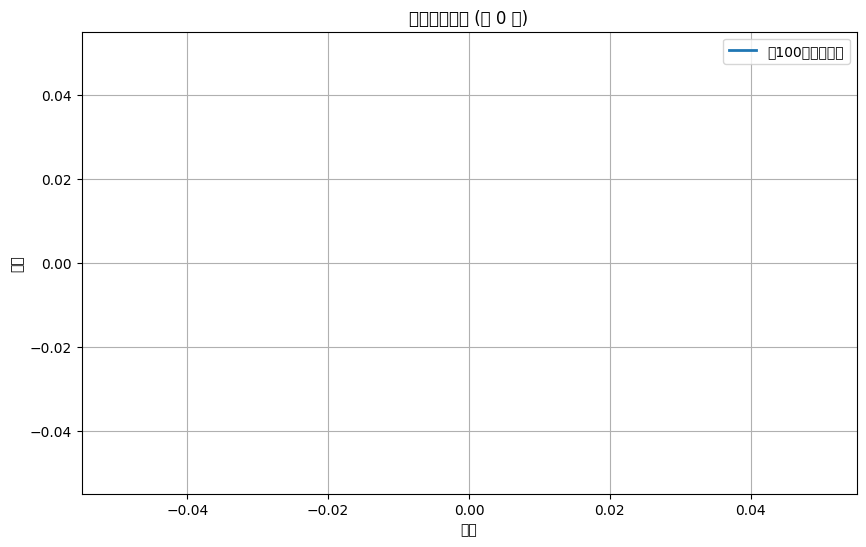

In [19]:

# 计算每100轮的平均损失
avg_losses = [sum(all_losses[i:i+100])/100 for i in range(0, len(all_losses), 100)]

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(avg_losses)*100, 100), avg_losses, label='每100轮平均损失', linewidth=2)
plt.xlabel('轮数')
plt.ylabel('损失')
plt.title(f'训练损失曲线 (共 {len(all_losses)} 轮)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:

def run_on_test_data():
    
    test_losses = []  # 用于存储测试集上的总损失
    test_prob_losses = []  # 用于存储测试集上的概率损失
    test_time_losses = []  # 用于存储测试集上的时间损失
    with torch.no_grad():
        # for g in test_dataloader:
        for g in san_dataloader:
            g = g.to(device)
            g = dgl.add_self_loop(g)
            probs, times = model(g, g.ndata["feat"].float())
            
            t = g.ndata["label"][0]
            true_probs = t[::2]
            true_times = t[1::2]
            
            probs = probs.squeeze(0)
            times = times.squeeze(0)
            # 准备表格数据
            table_data = []
            for i in range(len(true_probs)):
                table_data.append([
                    f"策略 {i+1}",
                    f"{true_probs[i]:.4f}",
                    f"{probs[i].item():.4f}",
                    f"{true_times[i]:.4f}",
                    f"{times[i].item():.4f}"
                ])
            
            # 打印表格
            headers = ["策略", "真实概率", "预测概率", "真实时间", "预测时间"]
            print(tabulate(table_data, headers=headers, tablefmt="grid"))
            # input()
            
            loss_prob = criterion_prob(probs, true_probs)
            loss_time = criterion_time(times, true_times)
            weighted_loss_prob = prob_weight * loss_prob
            loss = weighted_loss_prob + loss_time
            
            test_losses.append(loss.item())
            test_prob_losses.append(loss_prob.item())
            test_time_losses.append(loss_time.item())

    # 计算平均损失
    avg_test_loss = sum(test_losses) / len(test_losses)
    avg_test_prob_loss = sum(test_prob_losses) / len(test_prob_losses)
    avg_test_time_loss = sum(test_time_losses) / len(test_time_losses)

    print(f"测试集上的平均损失: {avg_test_loss:.4f}")
    print(f"测试集上的平均概率损失: {avg_test_prob_loss:.4f}")
    print(f"测试集上的平均时间损失: {avg_test_time_loss:.4f}")

run_on_test_data()

+---------+------------+------------+------------+------------+
| 策略    |   真实概率 |   预测概率 |   真实时间 |   预测时间 |
+=========+============+============+============+============+
| 策略 1  |          1 |          1 |      0.093 |     0      |
+---------+------------+------------+------------+------------+
| 策略 2  |          1 |          1 |      0.036 |     0      |
+---------+------------+------------+------------+------------+
| 策略 3  |          0 |          0 |     30     |    30.0032 |
+---------+------------+------------+------------+------------+
| 策略 4  |          1 |          1 |      0.01  |     0      |
+---------+------------+------------+------------+------------+
| 策略 5  |          0 |          0 |     30     |    30.0525 |
+---------+------------+------------+------------+------------+
| 策略 6  |          0 |          0 |     30     |    29.991  |
+---------+------------+------------+------------+------------+
| 策略 7  |          0 |          0 |     30     |    29.9512 |
+-------

In [ ]:
# 在测试集上评估模型
model.eval()  # 将模型设置为评估模式
test_losses = []
test_prob_losses = []
test_time_losses = []

# 将模型移动到CPU


model = model1

# 将模型移回GPU
model = model.to(device)

print("模型已重新初始化并移回到", device)

model.eval()


# 可视化测试结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(true_probs.cpu().numpy(), probs.cpu().numpy())
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('真实概率')
plt.ylabel('预测概率')
plt.title('概率预测对比')

plt.subplot(1, 2, 2)
plt.scatter(true_times.cpu().numpy(), times.cpu().numpy())
plt.plot([min(true_times.cpu().numpy()), max(true_times.cpu().numpy())], 
         [min(true_times.cpu().numpy()), max(true_times.cpu().numpy())], 'r--')
plt.xlabel('真实时间')
plt.ylabel('预测时间')
plt.title('时间预测对比')

plt.tight_layout()
plt.show()


模型已重新初始化并移回到 cuda
+---------+------------+------------+------------+------------+
| 策略    |   真实概率 |   预测概率 |   真实时间 |   预测时间 |
+=========+============+============+============+============+
| 策略 1  |          0 |     0.2565 |         30 |    21.5573 |
+---------+------------+------------+------------+------------+
| 策略 2  |          0 |     0.1879 |         30 |    23.9094 |
+---------+------------+------------+------------+------------+
| 策略 3  |          0 |     0.0724 |         30 |    27.7799 |
+---------+------------+------------+------------+------------+
| 策略 4  |          0 |     0.1781 |         30 |    24.1888 |
+---------+------------+------------+------------+------------+
| 策略 5  |          0 |     0.4337 |         30 |    18.3706 |
+---------+------------+------------+------------+------------+
| 策略 6  |          0 |     0.514  |         30 |    17.0311 |
+---------+------------+------------+------------+------------+
| 策略 7  |          0 |     0.0633 |         30 |    

KeyboardInterrupt: Interrupted by user

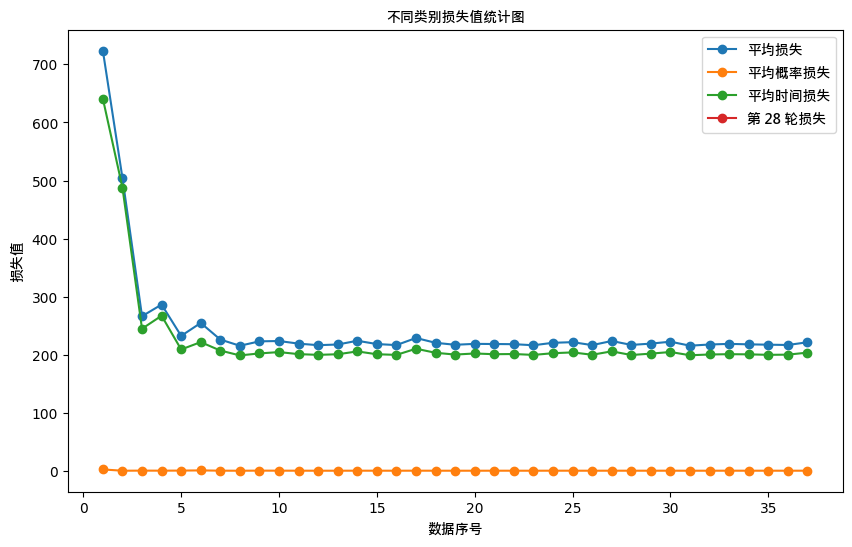

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 指定中文字体路径，例如可以使用系统中的黑体字体
font_path = 'E:\Windows\Fonts\msjhbd.ttc'
prop = fm.FontProperties(fname=font_path)

# 从文件读取文本
with open('nodegnnout1.txt', 'r') as f:
    text = f.read()

# 定义四类损失的名称列表
categories = ['平均损失', '平均概率损失', '平均时间损失', '第 28 轮损失']
category_dict = {category: [] for category in categories}

data_idx = 0
for line in text.split('\n'):
    for category in categories:
        if category in line:
            if "损失 =" in line:
                number_str = line.split('=')[1].strip()
            else:
                number_str = line.split(': ')[1]
            category_dict[category].append(float(number_str))
            data_idx += 1

# 绘制统计图
plt.figure(figsize=(10, 6))
for category, values in category_dict.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', linestyle='-', label=category)

plt.xlabel('数据序号', fontproperties=prop)
plt.ylabel('损失值', fontproperties=prop)
plt.title('不同类别损失值统计图', fontproperties=prop)
plt.legend(prop=prop)
plt.show()